In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates

In [ ]:
#data check
#another way to check the era5 data
ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')
ds_era

In [ ]:
#phony_dim_0: 1460(timestep); phony_dim_1: 20(variable); phony_dim_2: 721(longitude); phony_dim_3: 144(latitude)


#fcn-based on ECMWF initial conditions plots


ds_fcn_ecmwf = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210704_00_backtransformed.nc')
ds_fcn_ecmwf

ds_fcn_ecmwf.forecast[50,0,2,::-1,:]
ds_era.fields[709,2,260:40:-1,720:1200]

ds_ecmwf = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210614_00_sfc.nc')
ds_ecmwf

lon_ec = ds_ecmwf['longitude']
lat_ec = ds_ecmwf['latitude']

lat_ec

In [3]:
#check for the index of lat and lon for the box-ecmwf
rightlon = -111.50
leftlon = -131.50
toplat = 60.25
bottomlat = 40.25

indices_toplat = np.where(lat_ec == toplat)[0]
indices_bottomlat = np.where(lat_ec == bottomlat)[0]
indices_rightlon = np.where(lon_ec == rightlon)[0]
indices_leftlon = np.where(lon_ec == leftlon)[0]

In [4]:
indices_toplat

array([79])

In [5]:
indices_bottomlat

array([159])

In [6]:
indices_rightlon

array([274])

In [7]:
indices_leftlon

array([194])

In [8]:
#ECMWF
directory = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/'
filename_pattern = r'fc_cf_\d{8}_\d{2}_sfc\.nc'

files = sorted([f for f in os.listdir(directory) if re.match(filename_pattern, f)])
files

data_ec = []
for file in files:
    file_path = os.path.join(directory, file)
    # Extract the date from the filename
    #date_str = re.search(r'\d{8}_\d{2}', file).group(0)
    #date = datetime.datetime.strptime(date_str, '%Y%m%d_%H').date()
    # Read the file and extract the desired variable
    ds = xr.open_dataset(file_path)
    variable_data = ds['t2m'] 

    #time_coord = xr.DataArray([date], dims='time1', coords={'time1': [date]})
    #variable_data = variable_data.expand_dims(dim='time1')
    #variable_data = variable_data.assign_coords(time=time_coord)

    data_ec.append(variable_data)

#combined_data = xr.concat(data, dim='time1')
#combined_data
#combined_data[0,:,119,234]
np.shape(data_ec)

#ds_ecmwf.t2m[0,79:159,194:274]
data_array_ec =xr.DataArray(data_ec)
#data_array_ec[:,0,0,0]
mean_ecmwf = np.mean(data_array_ec[:,:,79:159,194:274], axis=(-2, -1))
mean_ecmwf

<xarray.DataArray (dim_0: 21, dim_1: 57)>
array([[291.70703, 286.1615 , 283.22815, ..., 284.6459 , 290.33533,
        291.5221 ],
       [291.96188, 286.339  , 283.43274, ..., 284.31247, 290.37762,
        291.0119 ],
       [288.3087 , 283.8899 , 281.55707, ..., 285.71738, 291.6278 ,
        293.80847],
       ...,
       [295.52722, 290.61417, 287.7209 , ..., 285.25778, 291.68387,
        294.01172],
       [294.1679 , 289.59183, 286.5282 , ..., 289.29706, 296.9091 ,
        298.93555],
       [293.778  , 289.14584, 286.06363, ..., 284.82907, 291.46527,
        293.41467]], dtype=float32)
Dimensions without coordinates: dim_0, dim_1

In [9]:
ec_614 = mean_ecmwf[0,56]
ec_615 = mean_ecmwf[1,52]
ec_616 = mean_ecmwf[2,48]
ec_617 = mean_ecmwf[3,44]
ec_618 = mean_ecmwf[4,40]

In [10]:
start_index = 56
step_size = 1
num_iterations =15
ec_values=[]
for i in range(num_iterations):
    ec_value = mean_ecmwf[(i+1) * step_size, start_index - i * step_size*4]
    ec_values.append(ec_value)
data_array_ec_values =xr.DataArray(ec_values)
#%store data_array_ec_values_cf
#np.shape(data_array_ec_values)

In [11]:
#era5 file index checking
# Assuming you have longitude and latitude arrays with 0.25-degree resolution
lat = np.linspace(25, 80, 220)
lon = np.linspace(-180, -60, 480)


rightlon = -111.50
leftlon = -131.50
toplat = 60.25
bottomlat = 40.25
# Calculate the indices for the desired grid point
rightlon_index = int(round((rightlon - lon[0]) / 0.25))
leftlon_index = int(round((leftlon - lon[0]) / 0.25))
toplat_index = int(round((lat[0]-toplat) / 0.25))
bottomlat_index = int(round((lat[0]-bottomlat) / 0.25))

In [13]:
rightlon_index

274

In [14]:
leftlon_index

194

In [15]:
toplat_index

-141

In [16]:
bottomlat_index

-61

In [17]:
#era5 data
ds_era5 = ds_era.fields[656:737:4,2,260:40:-1,720:1200]
np.shape(ds_era5)

(21, 220, 480)

In [18]:
ds_era5_1 = ds_era5[:,61:141,194:274]
np.shape(ds_era5_1)

mean_era5 = np.mean(ds_era5_1, axis=(1, 2))
mean_era5

mean_era5_06_29 = mean_era5[15]
mean_era5_06_29

<xarray.DataArray 'fields' ()>
array(302.749, dtype=float32)

In [11]:
#fcn_ecmwf
directory_fcn_ec = '/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/'
filename_pattern_fcn_ec = r'\d{8}_00_backtransformed\.nc'
#fc_cf_20210615_00_sfc.nc
#20210704_00_backtransformed.nc
files_fcn_ec = sorted([f for f in os.listdir(directory_fcn_ec) if re.match(filename_pattern_fcn_ec, f)])
files_fcn_ec

data_fcn_ec = []
for file1 in files_fcn_ec:
    file_path_fcn_ec = os.path.join(directory_fcn_ec, file1)
    # Extract the date from the filename
    date_str = re.search(r'\d{8}', file1).group(0)
    
    date = datetime.datetime.strptime(date_str, '%Y%m%d').date()
    # Read the file and extract the desired variable
    ds_fcn_ec = xr.open_dataset(file_path_fcn_ec)
    variable_data_fcn_ec =  ds_fcn_ec['forecast'][50,:,2,79:159,194:274]
    data_fcn_ec.append(variable_data_fcn_ec)

data_array_fcn_ec =xr.DataArray(data_fcn_ec)    

mean_fcn_ec = np.mean(data_array_fcn_ec, axis=(-2, -1))
mean_fcn_ec

start_index = 56
step_size = 1
num_iterations =15
fcn_ec_values=[]
for i in range(num_iterations):
    fcn_ec_value = mean_fcn_ec[(i+1) * step_size, start_index - i * step_size*4]
    fcn_ec_values.append(fcn_ec_value)
data_array_fcn_ec_values =xr.DataArray(fcn_ec_values)
data_array_fcn_ec_values[14] = data_array_ec_values[14]
#replace the missing data


Stored 'data_array_fcn_ec_values_cf' (DataArray)


In [12]:
#fcn_era5
ds_fcn_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
ds_fcn_era
mean_fcn_era = np.mean(ds_fcn_era.forecast[:,0,:,2,79:159,194:274], axis=(-2, -1))
mean_fcn_era
start_index = 56
step_size = 1
num_iterations =15
fcn_era_values=[]
for i in range(num_iterations):
    fcn_era_value = mean_fcn_era[(i+1) * step_size, start_index - i * step_size*4]
    fcn_era_values.append(fcn_era_value)
data_array_fcn_era_values=xr.DataArray(fcn_era_values)

#data_array_fcn_era_values

Stored 'data_array_fcn_era_values_cf' (DataArray)


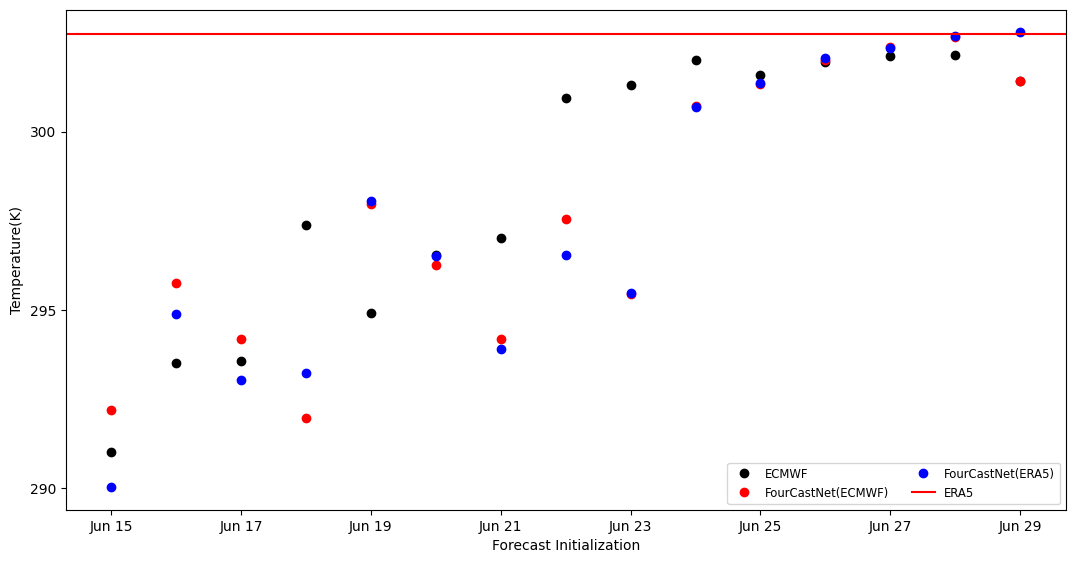

In [24]:
#creating plots
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
index_dates = pd.date_range('2021-06-15', periods=15, freq='D')
index_dates
date_format = mdates.DateFormatter('%b %d')

x = np.linspace(0,14,15)

y_ticks = range(285, 303, 5)  # Generate tick positions with a gap of 5 units
ax.set_yticks(y_ticks)




y = data_array_ec_values[:]
y1 = data_array_fcn_ec_values[:]
y2 = data_array_fcn_era_values[:]
df = pd.DataFrame(y, index=index_dates)
df_1 = pd.DataFrame(y1, index=index_dates)
df_2 = pd.DataFrame(y2, index=index_dates)
plt.plot(df, 'o', color='black',label='ECMWF')
plt.plot(df_1, 'o', color='red',label='FourCastNet(ECMWF)')
plt.plot(df_2, 'o', color='blue',label='FourCastNet(ERA5)')
plt.gca().xaxis.set_major_formatter(date_format)
plt.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
plt.xlabel('Forecast Initialization')
plt.ylabel('Temperature(K)')
plt.legend(ncol=2,fontsize='small')
plt.savefig('/home/kit/imk-tro/gj5173/plots_another_ts/T2m_ts_another.png', bbox_inches='tight',dpi=100)
#plt.xticks(time_range)
plt.show()

In [11]:
import matplotlib.pyplot as pl

# there are 4 individuals, each one tested under 3 different settings

# --- Random data, e.g. results per algorithm:

# Invidual 1
d1_1 = [1,1,2,2,3,3]
d1_2 = [3,3,4,4,5,5]
d1_3 = [5,5,6,6,7,7]

# Individual 2
d2_1 = [7,7,8,8,9,9]
d2_2 = [9,9,10,10,11,11]
d2_3 = [11,11,12,12,13,13]

# Individual 3
d3_1 = [1,2,3,4,5,6]
d3_2 = [4,5,6,7,8,9]
d3_3 = [10,11,12,13,14,15]

# Individual 4
d4_1 = [1,1,2,2,3,3]
d4_2 = [9,9,10,10,11,11]
d4_3 = [10,11,12,13,14,15]


# --- Combining your data:
data_group1 = [d1_1, d1_2, d1_3]
data_group2 = [d2_1, d2_2, d2_3]
data_group3 = [d3_1, d3_2, d3_3]
data_group4 = [d4_1, d4_2, d4_3]

colors = ['pink', 'lightblue', 'lightgreen', 'violet']

# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [data_group1, data_group2, data_group3, data_group4]
len(data_groups)

4

2.0

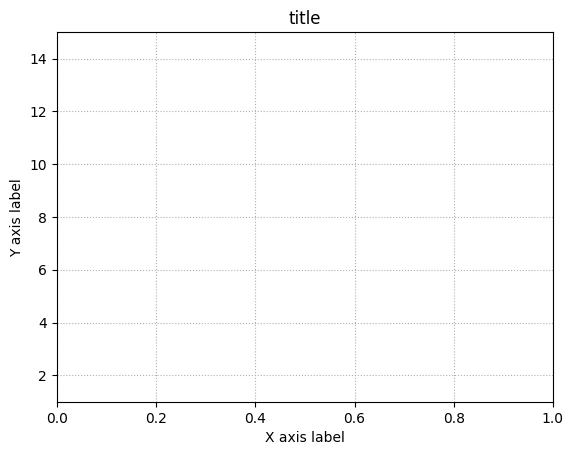

In [18]:
# --- Labels for your data:
labels_list = ['a','b', 'c']
width       = 1/len(labels_list)
xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_group1)) ]

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])

ax = pl.gca()
ax.set_ylim(ymin,ymax)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('X axis label')
pl.ylabel('Y axis label')
pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

In [5]:
# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

In [21]:
group_positions

[[-0.515, 1.1516666666666664, 2.818333333333333],
 [-0.17166666666666666, 1.4949999999999999, 3.161666666666666],
 [0.17166666666666666, 1.8383333333333332, 3.505],
 [0.515, 2.1816666666666666, 3.848333333333333]]

In [16]:
num

3

In [17]:
len(group_positions)

4

-1.5
-0.5
0.5
1.5


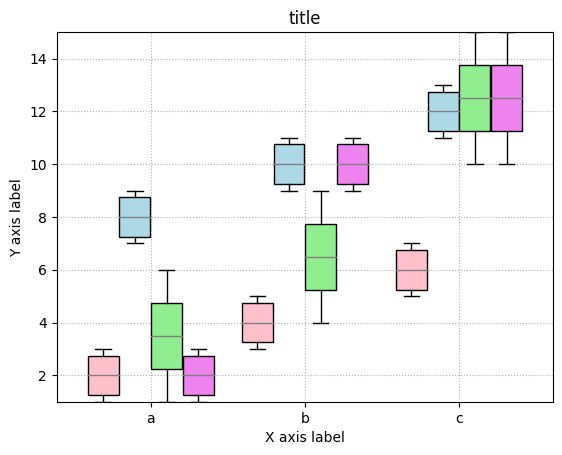

In [5]:
for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,
                )
ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=0 )



pl.show()